In [1]:
import pandas as pd

file_path = '/Users/charan/Desktop/Semesters/Sem 3/AIT 664/creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
# Check for missing values
missing_values = data.isnull().sum().any()

In [5]:
# Z-score outlier detection
from scipy import stats

z_scores = stats.zscore(data['Amount'])
outliers = data[(z_scores > 3) | (z_scores < -3)] 

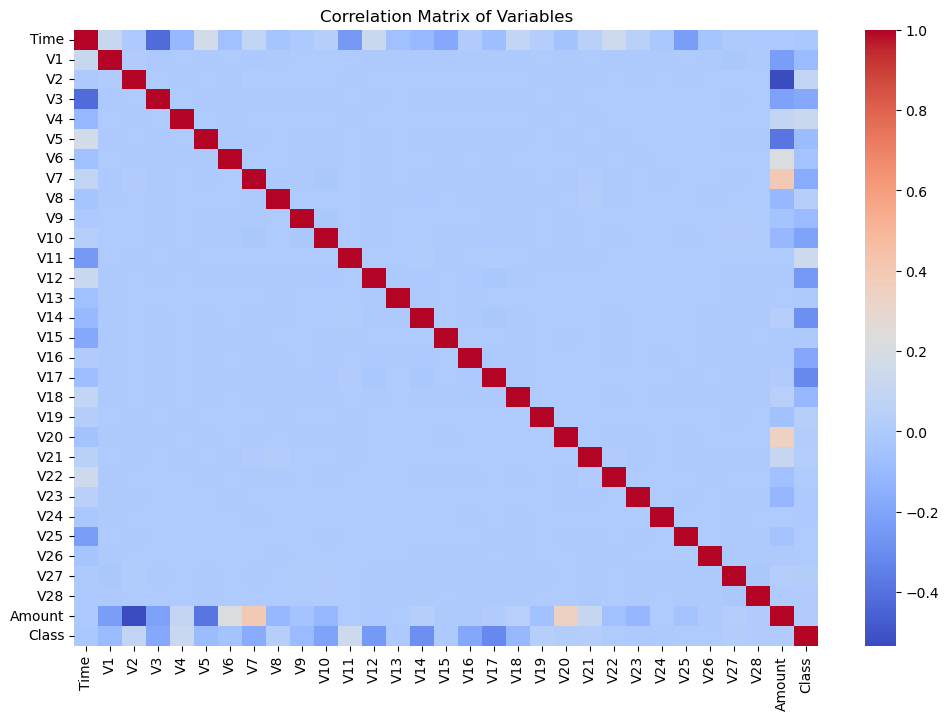

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Variables')
plt.show()

In [7]:
# Checking class distribution
class_distribution = data['Class'].value_counts()
print(class_distribution)

Class
0    283253
1       473
Name: count, dtype: int64


In [8]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip show scikit-learn imbalanced-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


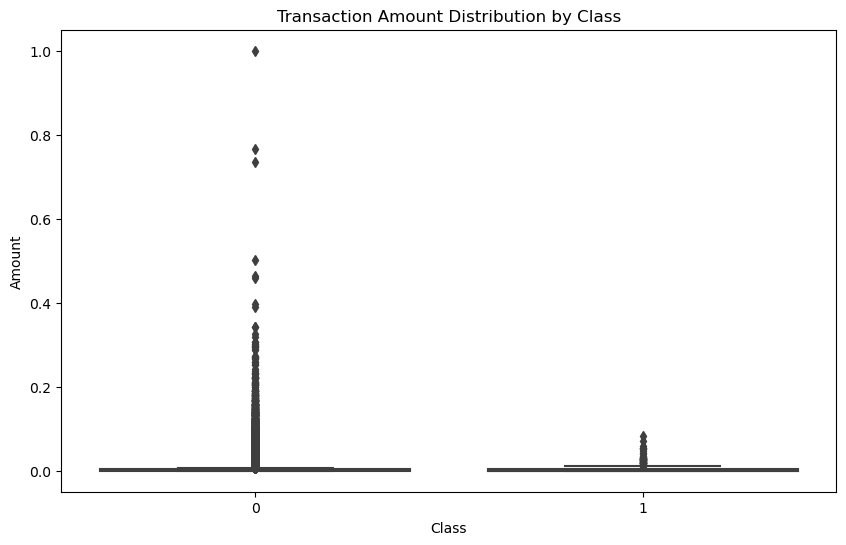

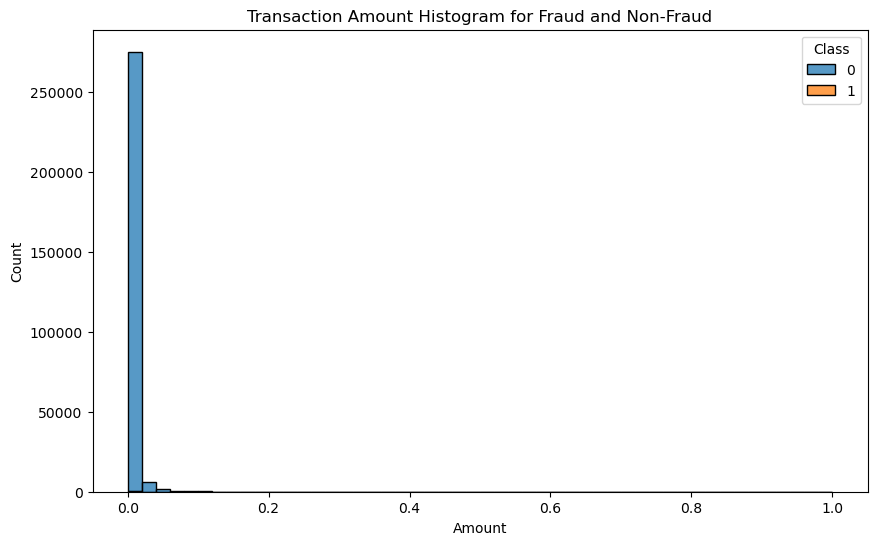

In [11]:
# Visualize transaction amounts for each class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount Distribution by Class')
plt.show()

# Histograms of the 'Amount' feature by class
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='Class', multiple="stack", bins=50)
plt.title('Transaction Amount Histogram for Fraud and Non-Fraud')
plt.show()


/Users/charan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


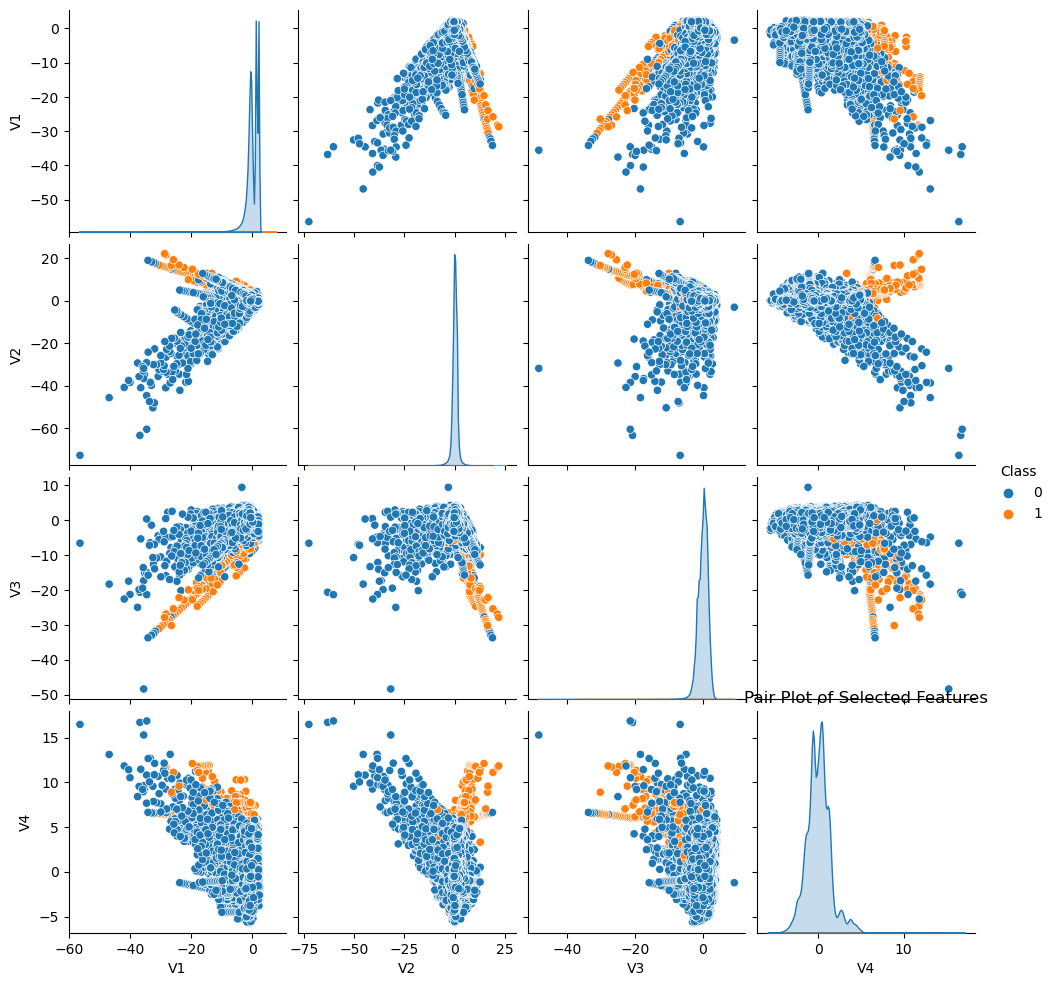

In [12]:
# Pair plot of selected features
sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'Class']], hue='Class', diag_kind='kde')
plt.title('Pair Plot of Selected Features')
plt.show()

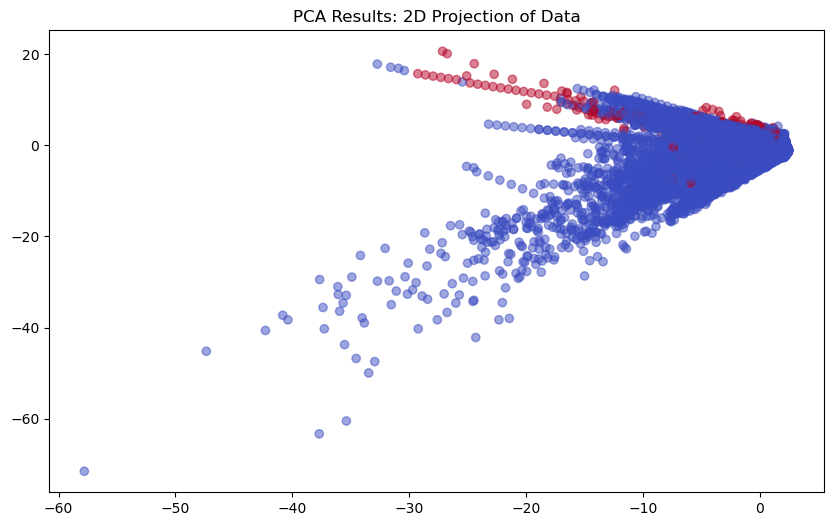

In [13]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('PCA Results: 2D Projection of Data')
plt.show()


In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)



In [16]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Evaluation for Logistic Regression
print("Logistic Regression Report")
print(classification_report(y_test, logreg_pred))
logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
print(f'Logistic Regression ROC AUC: {logreg_roc_auc}')

# Evaluation for Random Forest
print("Random Forest Report")
print(classification_report(y_test, rf_pred))
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'Random Forest ROC AUC: {rf_roc_auc}')

# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rf_pred))


Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.57      0.69       134

    accuracy                           1.00     85118
   macro avg       0.94      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118

Logistic Regression ROC AUC: 0.969421285270906
Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.72      0.82       134

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Random Forest ROC AUC: 0.9347978671314425
Random Forest Confusion Matrix
[[84979     5]
 [   37    97]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example of tuning Random Forest hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# Best parameters from the grid search
print("Best parameters for Random Forest:", grid_rf.best_params_)


In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest Cross-Validation AUC Scores: {rf_cv_scores}")
